In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import glob
import os
import json
import random
import shutil
import cv2
from PIL import Image, ImageOps

In [9]:
img_path = "human_dataset/images/train/"
label_path = "human_dataset/labels__2/train/"

0.2689453125 0.5412361991215228 0.52625 0.914634
6 57 544 681


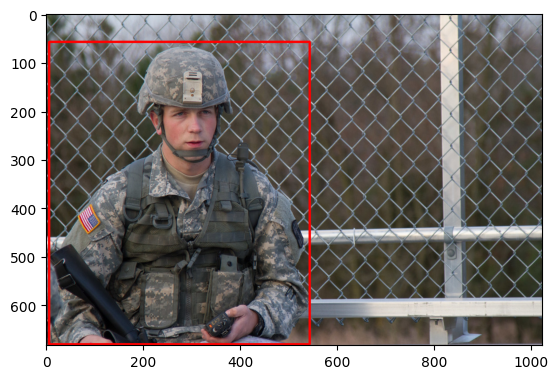

0.102265625 0.52838575 0.14625 0.649166
30 156 178 654
0.3508984375 0.549583 0.31187499999999996 0.6883340000000001
200 158 518 686
0.466484375 0.48359408333333337 0.169375 0.6608329999999999
391 118 563 624
0.654296875 0.31260383333333336 0.24687499999999996 0.215
544 158 796 322
0.843359375 0.5129684166666667 0.13749999999999996 0.6716669999999999
793 136 933 650
0.960859375 0.5086461666666667 0.04375000000000007 0.22583300000000003
961 304 1005 476


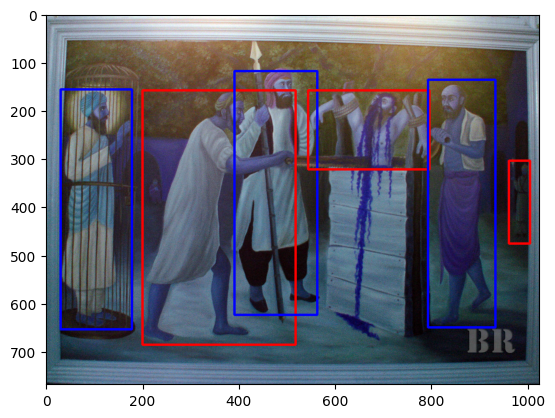

In [10]:
# xmn ymn xmx ymx 
i = 0

for file_name in os.listdir(img_path):
    if file_name[-4:] == '.jpg'  :
        file_txt = file_name[:-4]
        img = cv2.imread(img_path + file_name)
        with open(f"{label_path}{file_txt}.txt") as f:
            kaggle = f.read()
        for line in kaggle.split("\n"):
            if line =="":
                continue
            _, cx,cy,w,h = line.split(" ")
            print(cx,cy,w,h)
            cx = int(float(cx) * img.shape[1])
            cy = int(float(cy) * img.shape[0])
            w = int(float(w) * img.shape[1])
            h = int(float(h) * img.shape[0])
            xmin = cx - w//2
            ymin = cy- h//2
            xmax = cx + w//2
            ymax = cy+ h//2
            print(xmin, ymin, xmax,ymax)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.rectangle(img, (xmin, ymin), (xmax,ymax), color =[255], thickness = 3 )
        plt.imshow(img) 
        plt.show()
        i += 1
        if i == 2:
            break

In [11]:
input_dir_1 = "human_dataset/labels__2/train/"
input_dir_2 = "human_dataset/labels__2/val/"
output_dir_1 = "human_dataset/labels/train/"
output_dir_2 = "human_dataset/labels/val/"

# Create output directories if needed
if not os.path.isdir(output_dir_1):
    os.makedirs(output_dir_1)
if not os.path.isdir(output_dir_2):
    os.makedirs(output_dir_2)

for input_dir, output_dir in ((input_dir_1, output_dir_1), (input_dir_2, output_dir_2)):
    files = glob.glob(input_dir + "*.txt")
    for file in files:
        try:
            with open(file, "r") as f:
                kaggle = f.read()
            result = []
            filename = os.path.basename(file)
            # print(f"{filename}")
            for line in kaggle.split("\n"):
                if line =="":
                    continue
                _, cx,cy,w,h = line.split(" ")
                cx = float(cx)
                cy = float(cy)
                w = float(w)
                h = float(h)
                xmin = cx - w/2 if cx - w/2 >0 else 0
                ymin = cy- h/2 if cy- h/2 > 0 else 0
                xmax = cx + w/2 if cx + w/2 < 1 else 1
                ymax = cy+ h/2 if cy+ h/2 < 1 else 1
                yolo_bbox = [xmin, ymin, xmax, ymax]
                bbox_string = " ".join([str(x) for x in yolo_bbox])
                result.append(f"0 {bbox_string}")
            if result:
                with open(os.path.join(f"{output_dir}{filename}"), "w") as f:
                    f.write("\n".join(result))
        except Exception as e:
            print(f"Error processing {file}: {e}")


00001bcc92282a38.jpg
0 0.00582031249999998 0.08391919912152279 0.5320703124999999 0.9985531991215227


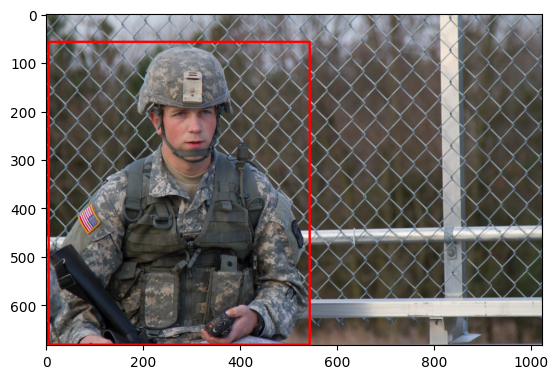

00005e7429a94ad4.jpg
0 0.029140625000000003 0.20380274999999998 0.175390625 0.85296875
0 0.19496093750000001 0.205416 0.5068359375 0.89375
0 0.38179687500000004 0.15317758333333342 0.551171875 0.8140105833333333
0 0.530859375 0.20510383333333337 0.777734375 0.42010383333333334
0 0.774609375 0.17713491666666675 0.912109375 0.8488019166666667
0 0.938984375 0.3957296666666667 0.9827343749999999 0.6215626666666667


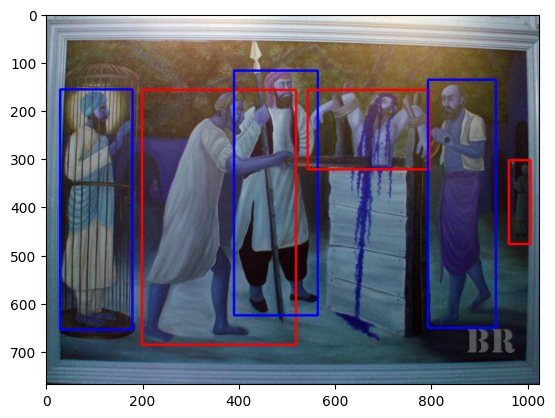

0000f53faa4d14c3.jpg
0 0 0 0.9985349375 0.9985359355783309


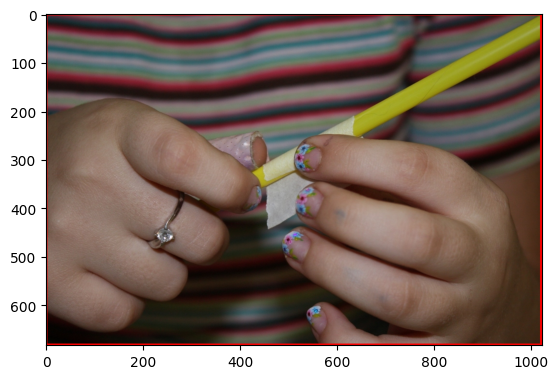

0000fcb8ed0ea243.jpg
0 0.013437500000000005 0.19843826281112736 0.20156249999999998 0.8776132628111273
0 0.43671875 0.18921668008784776 0.60234375 0.9002856800878477
0 0.5454296875 0.19738650512445105 0.7235546875000001 0.869056505124451


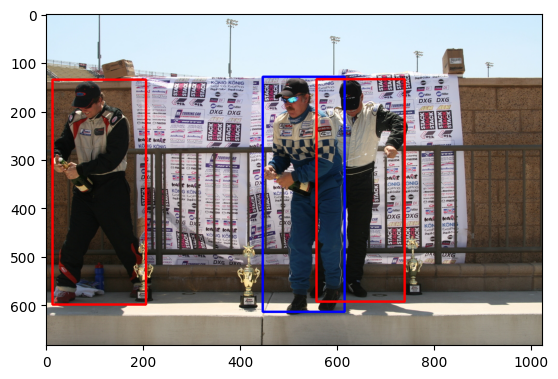

0002f32727ed756e.jpg
0 0.20843303372434016 0.25984375 0.46946603372434015 0.7848437500000001
0 0.4408071495601173 0.25859375 0.7732011495601172 0.8148437500000001


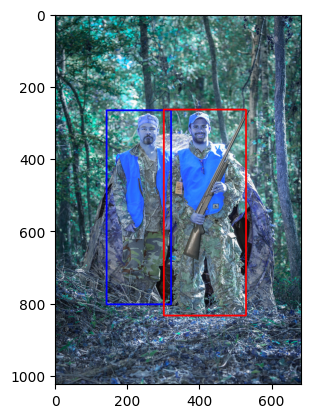

0002f9c7fac5f093.jpg
0 0.216015625 0.7752727300215982 0.267265625 0.9072707300215983
0 0.29742187499999995 0.827579661987041 0.357421875 0.9492106619870411
0 0.5022265625 0.7929854838012959 0.5516015624999999 0.9830334838012958
0 0.635546875 0.78628943412527 0.695546875 0.9507674341252701
0 0.69875 0.7973456252699784 0.73125 0.9445466252699786
0 0.744765625 0.7944092796976242 0.797265625 0.9519762796976242
0 0.7604296875000001 0.8112102300215983 0.7979296874999999 0.9432072300215982
0 0.8184765624999999 0.7967393347732182 0.8678515625000001 0.9149153347732181
0 0.849375 0.8235599762419007 0.880625 0.9009619762419007


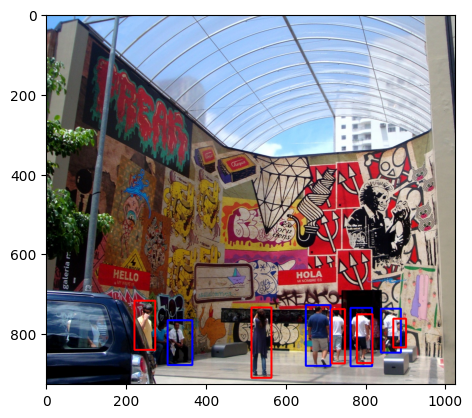

00035f7ca36a25fc.jpg
0 0.7982685625 0.5354028333333334 0.8322685625 0.7345138333333334


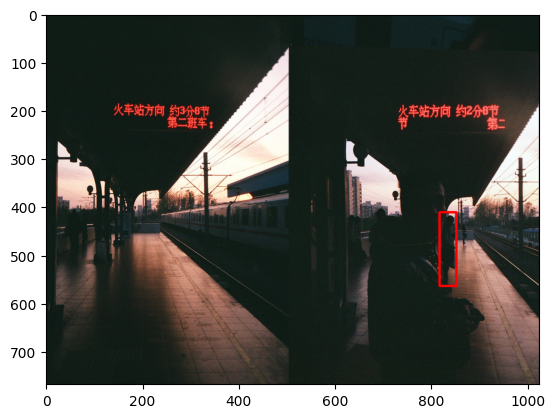

00037305278d0cd5.jpg
0 0.7826591875 0.6161709427244583 0.8666591875 0.7557059427244582


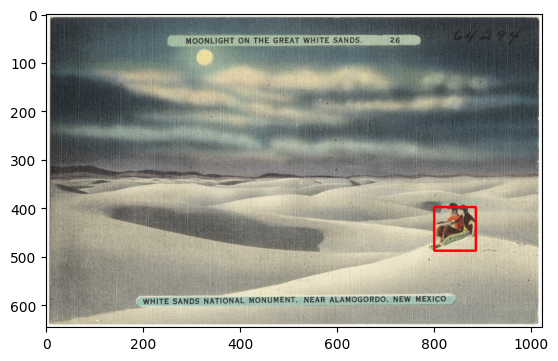

0003db14e5cdc1c4.jpg
0 0.515859375 0.6979225307467057 0.528359375 0.7232515307467057
0 0.5245703125000001 0.6813932730600292 0.5351953125 0.7001542730600292
0 0.53390625 0.6663827730600292 0.5426562500000001 0.6851447730600292
0 0.6880859374999999 0.5803504480234262 0.7018359375000001 0.638512448023426
0 0.7539453125 0.43882667496339683 0.7645703125000001 0.4791646749633968
0 0.760546875 0.44164217496339675 0.772421875 0.4801031749633967
0 0.7731250000000001 0.4473839326500732 0.79 0.49147393265007316
0 0.7854296875 0.4372794787701318 0.8073046875000001 0.5179554787701317
0 0.8505078125 0.45081138067349924 0.8761328125 0.5511873806734993


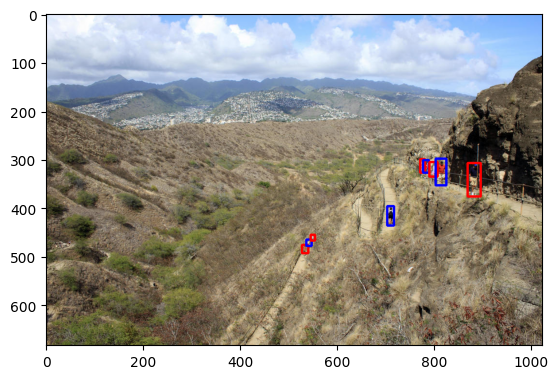

0004be5f2f0f1c66.jpg
0 0.0014583333333333393 0 0.3889583333333333 0.27359374999999997
0 0.47583366666666654 0.6648046875 0.9983336666666667 0.9991796875000001


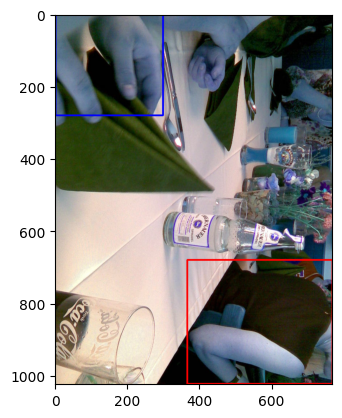

00055eec11509863.jpg
0 0 0 0.61765625 0.9982814166666667
0 0.42242187499999995 0 0.888671875 0.5658855833333334


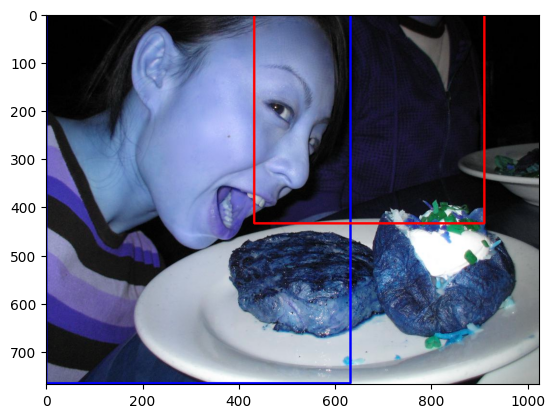

00056dc4f587f43e.jpg
0 0.01328025 0.6161772352941177 0.08515624999999999 0.7079412352941177
0 0.16015725 0.6208818823529412 0.20078125 0.7008818823529412
0 0.254296125 0.5820584411764705 0.337109125 0.6997054411764706
0 0.3857429375 0.5494112352941176 0.4623049375 0.6929412352941176
0 0.426171125 0.11647073529411764 0.508984125 0.2599997352941177
0 0.536719 0.5591176176470589 0.632031 0.6814706176470589
0 0.7105478749999999 0.547646705882353 0.801171875 0.672352705882353


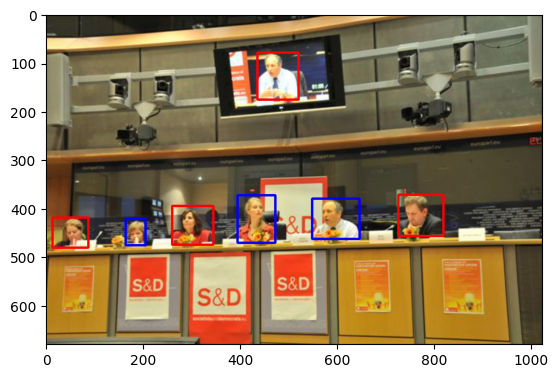

00059fa95ee95e65.jpg
0 0.32829183333333334 0.35203362499999996 0.9971988333333333 0.998119625
0 0.7603825476190477 0.358925625 0.9200455476190476 0.504459625


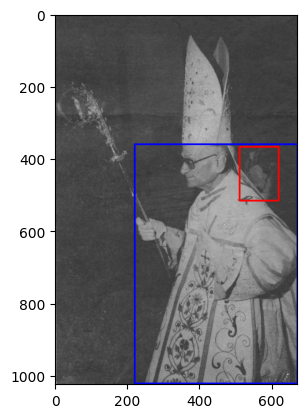

0006ab65eb5516c7.jpg
0 0 0.5149609374999999 0.641146 0.9987109375000001


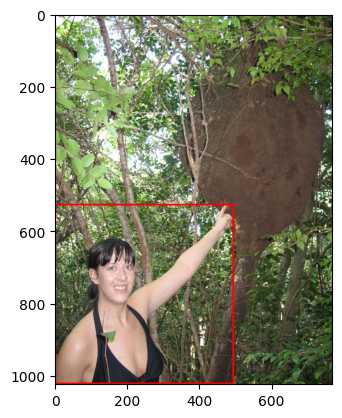

000736df72aedfa0.jpg
0 0 0.4707576171303074 0.025820312499999998 0.6555606171303074
0 0.0221875 0.4760448440702782 0.0540625 0.6439618440702781
0 0.09968750000000001 0.4782933074670572 0.1628125 0.7128153074670571
0 0.32183593750000006 0.4706303901903368 0.3668359375 0.6732573901903367
0 0.3709765625 0.4830663748169839 0.4059765625 0.6734983748169838


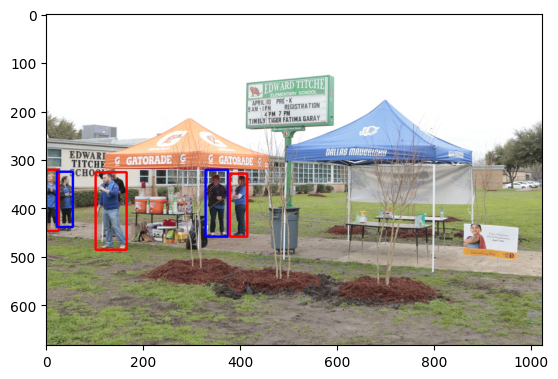

00074ae73610a804.jpg
0 0.41691406249999996 0.4593569553440703 0.6231640625 0.9040099553440702
0 0.5592578125000001 0.4906544421669107 0.6173828125 0.6388724421669106


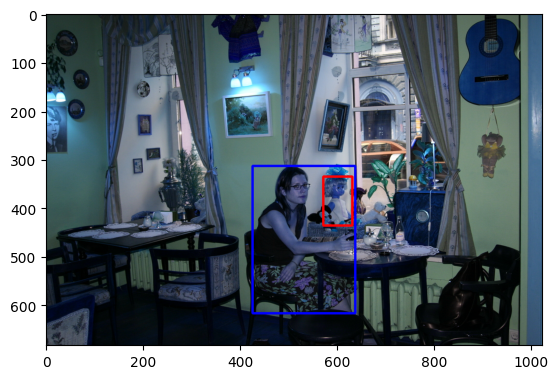

0007e06651e9a48b.jpg
0 0.29792968750000004 0.34284486375488926 0.6179296875 0.7334958637548892


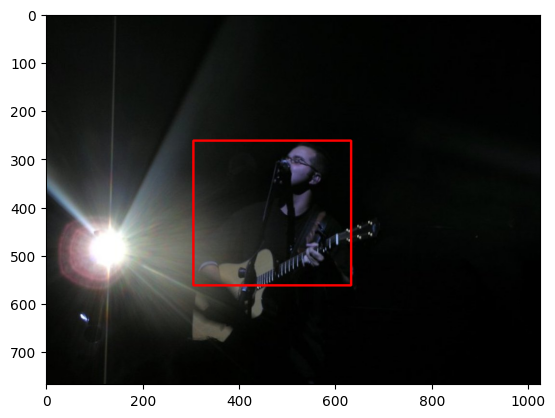

00081a6248b30e3d.jpg
0 0.27546875000000004 0.4558633823529411 0.36171875 0.7879423823529411
0 0.42460937499999996 0.5126036470588237 0.468359375 0.6029136470588236


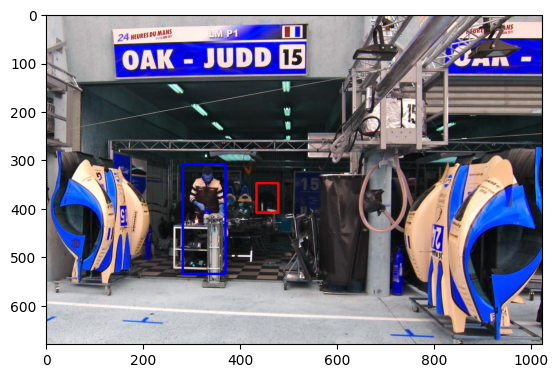

000a42c09609c847.jpg
0 0.07552093750000005 0 0.9654949374999999 0.8288994626647145


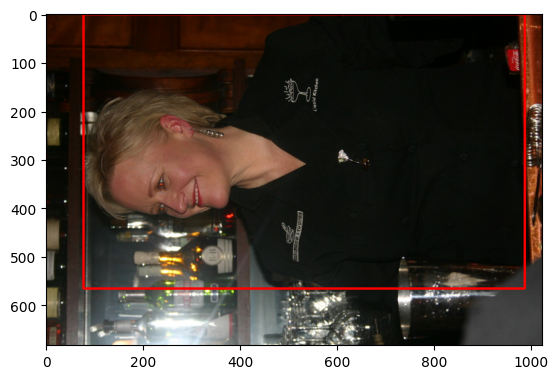

000baa6f7dae9b79.jpg
0 0.7727734374999999 0.24557225000000005 0.9590234375 0.9414062500000001
0 0 0.20473941666666678 0.9987109375000001 0.9214064166666667
0 0.016757812500000004 0.19822866666666672 0.0436328125 0.23489566666666667
0 0.0616015625 0.20213491666666672 0.0966015625 0.24880191666666668
0 0.3321484375 0.1871349166666667 0.36214843750000003 0.23380191666666666
0 0.4858593750000001 0.161979 0.560859375 0.241146


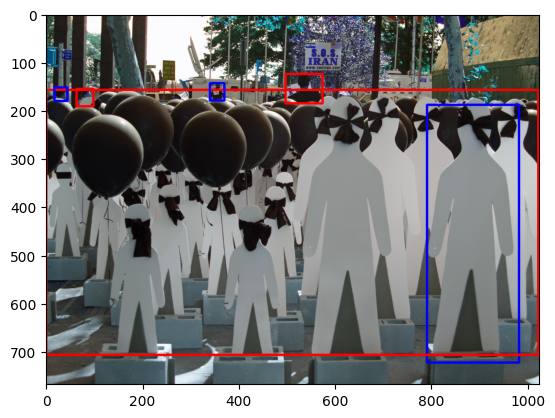

In [12]:
output_dir_1 = "human_dataset/labels/train/"
i = 0
for file_name in os.listdir(img_path):
    if file_name[-4:] == '.jpg'  :
        file_txt = file_name[:-4]
        img = cv2.imread(img_path + file_name)
        print(file_name)
        with open(f"{output_dir_1}{file_txt}.txt") as f:
            kaggle = f.read()
        print(kaggle)
        for line in kaggle.split("\n"):
            if line =="":
                continue
            _, xmin,ymin,xmax,ymax = line.split(" ")
            xmin = int(float(xmin) * img.shape[1])
            ymin = int(float(ymin) * img.shape[0])
            xmax = int(float(xmax) * img.shape[1])
            ymax = int(float(ymax) * img.shape[0])
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.rectangle(img, (xmin, ymin), (xmax,ymax), color =[255], thickness = 3 )
        plt.imshow(img) 
        plt.show()
        i += 1
        if i == 20:
            break


In [13]:
import shutil
data_path_train = "data/images/train/"
data_path_val = "data/images/val/"

label_train_1 = "human_dataset/labels__2/train/"
label_train_2 ="human_dataset/labels__2/val/"

destination_train = "data/labels/train/"
destination_val = "data/labels/val/"
if not os.path.isdir(destination_train):
    os.makedirs(destination_train)
if not os.path.isdir(destination_val):
    os.makedirs(destination_val)


for file_path, label_path, destination in((data_path_train, label_train_1,destination_train) ,(data_path_val, label_train_2, destination_val)):
    file = glob.glob(file_path + "*.jpg")
    for file_name in file:
        file_name = os.path.basename(file_name)
        source_file = label_path + file_name[:-4] +".txt"
        destination_folder = destination

        shutil.copy(source_file, destination_folder)


In [15]:
from PIL import Image
from torchvision import transforms
def resize_image(image, size):
    resize = transforms.Resize(size)
    return resize(image)

# Ví dụ sử dụng
folder_path = "data/images/train/"
output_folder_path = "data/images/train/"
size = (640, 640)

for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    image = Image.open(image_path)
    resized_image = resize_image(image, size)

    # Lưu ảnh đã thay đổi kích thước
    output_image_path = os.path.join(output_folder_path, filename)
    resized_image.save(output_image_path)
